## Графики и таблички

Я не знала, какие картинки выдать боту, поэтому сделала какой-то статистики из получившейся базы

In [1]:
import sqlite3
import pandas as pd

In [2]:
con = sqlite3.connect('voltron.db')
cur = con.cursor()

b_query = """
SELECT *
FROM main 
"""

In [3]:
df = pd.read_sql_query(b_query, con=con)

In [4]:
# остальные теги не добавляю, они слишком разные, чтобы пытаться искать какие-то очевидные корреляции
df.head()

,id,title,author,date,kudos,complete,age,genre
0,15699933,Life on the Atlas,Neversleepingalwaysdreaming,16 Aug 2018,591,Complete Work,Teen And Up Audiences,M/M
1,15699891,Under the Rubble,Rivea12,16 Aug 2018,5,Work in Progress,Teen And Up Audiences,"F/F, F/M, M/M"
2,15699831,Kitten Keith,MariRaii,16 Aug 2018,899,Complete Work,General Audiences,M/M
3,15699726,fake heroes and artificial love,who_tf_cares,16 Aug 2018,279,Complete Work,Teen And Up Audiences,M/M
4,15699738,The Way I Love You,orphan_account,16 Aug 2018,87,Complete Work,General Audiences,M/M


In [53]:
# для каждого персонажа\пары была отдельная строчка, поэтому их надо объединять

ch_query = """
SELECT *
FROM characters
"""

ch = pd.read_sql_query(ch_query, con=con)

In [54]:
ch.head()

,id,character
0,15699933,Keith (Voltron)
1,15699933,Keith's Wolf (Voltron)
2,15699933,Lance (Voltron)
3,15699933,Veronica (Voltron)
4,15699933,Pidge | Katie Holt


In [55]:
chn = ch.groupby('id')['character'].apply(', '.join).reset_index()
chn  # объединили персонажей

,id,character
0,7422148,"Keith (Voltron), Lance (Voltron), Shiro (Voltr..."
1,7603057,"Keith (Voltron), Lance (Voltron)"
2,7637152,"Allura (Voltron), Keith (Voltron), Lance (Volt..."
3,7700959,"Keith (Voltron), Lance (Voltron), Hunk (Voltro..."
4,7713748,"Keith (Voltron), Lance (Voltron), All main cast"
...,...,...
6324,37952665,"Keith (Voltron), Lance (Voltron), Hunk (Voltro..."
6325,37956235,"Keith (Voltron), Lance (Voltron), Shiro (Voltr..."
6326,37961116,"Keith (Voltron), Pidge (Voltron), Lance (Voltr..."
6327,37966516,"Keith (Voltron), Lance (Voltron), Shiro (Voltr..."


In [59]:
rel_query = """
SELECT *
FROM relationships
"""

rel = pd.read_sql_query(rel_query, con=con)

In [60]:
reln = rel.groupby('id')['relationship'].apply(', '.join).reset_index()
reln # объединили пары

,id,relationship
0,7422148,"Keith/Lance (Voltron), Allura/Shiro (Voltron)"
1,7603057,Keith/Lance (Voltron)
2,7637152,"Everyone & Everyone, Keith/Lance (Voltron)"
3,7700959,"Klance - Relationship, Keith/Lance (Voltron), ..."
4,7713748,Keith/Lance (Voltron)
...,...,...
5956,37952665,Keith/Lance (Voltron)
5957,37956235,Keith/Lance (Voltron)
5958,37961116,"Keith/Lance (Voltron), Allura/Lotor (Voltron),..."
5959,37966516,Original Female Character/Original Male Character


Теперь 3 таблицы сливаем в одну по id:

In [10]:
df = pd.merge(df, chn, on='id')
df.head()

,id,title,author,date,kudos,complete,age,genre,character
0,15699933,Life on the Atlas,Neversleepingalwaysdreaming,16 Aug 2018,591,Complete Work,Teen And Up Audiences,M/M,"Keith (Voltron), Keith's Wolf (Voltron), Lance..."
1,15699891,Under the Rubble,Rivea12,16 Aug 2018,5,Work in Progress,Teen And Up Audiences,"F/F, F/M, M/M","Lance (Voltron), Keith (Voltron), Shiro (Voltr..."
2,15699831,Kitten Keith,MariRaii,16 Aug 2018,899,Complete Work,General Audiences,M/M,"Keith (Voltron), Lance (Voltron), Hunk (Voltro..."
3,15699726,fake heroes and artificial love,who_tf_cares,16 Aug 2018,279,Complete Work,Teen And Up Audiences,M/M,"Lance (Voltron), Keith (Voltron), Hunk (Voltro..."
4,15699738,The Way I Love You,orphan_account,16 Aug 2018,87,Complete Work,General Audiences,M/M,"Shiro (Voltron), Lance (Voltron), Hunk (Voltro..."


In [11]:
df = pd.merge(df, reln, on='id')
df.head()

,id,title,author,date,kudos,complete,age,genre,character,relationship
0,15699933,Life on the Atlas,Neversleepingalwaysdreaming,16 Aug 2018,591,Complete Work,Teen And Up Audiences,M/M,"Keith (Voltron), Keith's Wolf (Voltron), Lance...",Keith/Lance (Voltron)
1,15699891,Under the Rubble,Rivea12,16 Aug 2018,5,Work in Progress,Teen And Up Audiences,"F/F, F/M, M/M","Lance (Voltron), Keith (Voltron), Shiro (Voltr...",Keith/Lance (Voltron)
2,15699831,Kitten Keith,MariRaii,16 Aug 2018,899,Complete Work,General Audiences,M/M,"Keith (Voltron), Lance (Voltron), Hunk (Voltro...",Keith/Lance (Voltron)
3,15699726,fake heroes and artificial love,who_tf_cares,16 Aug 2018,279,Complete Work,Teen And Up Audiences,M/M,"Lance (Voltron), Keith (Voltron), Hunk (Voltro...","Keith/Lance (Voltron), Hunk & Pidge | Katie Ho..."
4,15699738,The Way I Love You,orphan_account,16 Aug 2018,87,Complete Work,General Audiences,M/M,"Shiro (Voltron), Lance (Voltron), Hunk (Voltro...",Lance/Shiro (Voltron)


In [12]:
len(df)

5807

In [13]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [14]:
# перевожу даты в числовые
def changer(dte):
    ch = {'Jan':'01', 'Feb':'02','Mar':'03','Apr':'04','May':'05',
          'Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12',}
    d, mn, yr = dte.strip().split()
    mn = ch[mn]
    dte = f'{yr}-{mn}-{d}'
    return dte

df['date'] = df['date'].apply(changer)

In [15]:
df.head()

,id,title,author,date,kudos,complete,age,genre,character,relationship
0,15699933,Life on the Atlas,Neversleepingalwaysdreaming,2018-08-16,591,Complete Work,Teen And Up Audiences,M/M,"Keith (Voltron), Keith's Wolf (Voltron), Lance...",Keith/Lance (Voltron)
1,15699891,Under the Rubble,Rivea12,2018-08-16,5,Work in Progress,Teen And Up Audiences,"F/F, F/M, M/M","Lance (Voltron), Keith (Voltron), Shiro (Voltr...",Keith/Lance (Voltron)
2,15699831,Kitten Keith,MariRaii,2018-08-16,899,Complete Work,General Audiences,M/M,"Keith (Voltron), Lance (Voltron), Hunk (Voltro...",Keith/Lance (Voltron)
3,15699726,fake heroes and artificial love,who_tf_cares,2018-08-16,279,Complete Work,Teen And Up Audiences,M/M,"Lance (Voltron), Keith (Voltron), Hunk (Voltro...","Keith/Lance (Voltron), Hunk & Pidge | Katie Ho..."
4,15699738,The Way I Love You,orphan_account,2018-08-16,87,Complete Work,General Audiences,M/M,"Shiro (Voltron), Lance (Voltron), Hunk (Voltro...",Lance/Shiro (Voltron)


In [16]:
df = df.sort_values(by ='date')
df.head()

,id,title,author,date,kudos,complete,age,genre,character,relationship
2099,11739690,Indulgence,gingayellow,2017-08-08,25,Complete Work,General Audiences,"Gen, M/M","Shiro (Voltron), Keith (Voltron)",Shiro/Keith
2082,11746488,I'll Find You,orphan_account,2017-08-08,89,Complete Work,General Audiences,Gen,"Shiro (Voltron), Black Lion (Voltron)",Shiro & Black Lion (Voltron)
2081,11746980,Fight For Me,heavenlyrare,2017-08-08,56,Complete Work,General Audiences,M/M,"Undisclosed Character(s), Hunk (Voltron), Keit...",Hunk/Keith (Voltron)
2080,11747067,Inopportune,Ironic_Swag7782,2017-08-08,569,Complete Work,General Audiences,"F/M, M/M","Lance (Voltron), Keith (Voltron), Shiro (Voltron)","Allura/Shiro (Voltron), Keith/Lance (Voltron)"
2079,11747511,a new beginning,skyestiel,2017-08-08,1747,Complete Work,General Audiences,M/M,"Keith (Voltron), Lance (Voltron), Mentions of ...",Keith/Lance (Voltron)


Я поздно поняла, что с датами работать нельзя, потому что на сайте работы упорядочены по датам, а я скачала не все, чтобы не уронить модель.

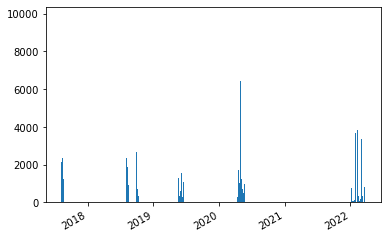

In [18]:
import datetime as dt

x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df['date']]

plt.bar(x, df['kudos'])
plt.gcf().autofmt_xdate()

<BarContainer object of 5807 artists>

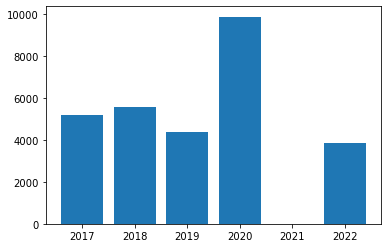

In [21]:
plt.bar(df['date'].apply(lambda x: int(x.split('-')[0])), df['kudos'])

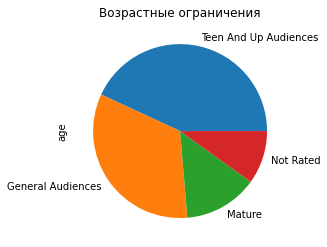

In [34]:
df['age'].value_counts().plot.pie(title='Возрастные ограничения')

plt.savefig('v_age.jpeg')

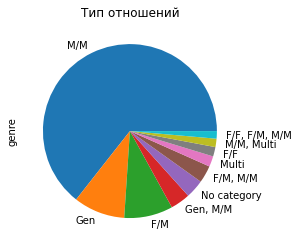

In [35]:
df['genre'].value_counts().head(10).plot.pie(title='Тип отношений')
plt.savefig('v_genre.jpeg')

In [36]:
df.sort_values(by ='kudos', ascending=False).head(7)

,id,title,author,date,kudos,complete,age,genre,character,relationship
4852,7422148,Blueprints,UnderTheSilentStars,2020-04-11,9885,Complete Work,Mature,M/M,"Keith (Voltron), Lance (Voltron), Shiro (Voltr...","Keith/Lance (Voltron), Allura/Shiro (Voltron)"
4478,7713748,live for the fight (when it's all that you got),Yuu_chi,2020-04-30,6435,Complete Work,Mature,M/M,"Keith (Voltron), Lance (Voltron), All main cast",Keith/Lance (Voltron)
5017,15830052,(You Can) Drop Your Façade,orphan_account,2018-10-13,5567,Complete Work,Teen And Up Audiences,"Multi, F/F, F/M, M/M","Keith (Voltron), Lance (Voltron), Shiro (Voltr...",Keith/Lance (Voltron)
1207,11881221,i wanna love you (but i don't know if i can),beautifulbane,2017-08-22,5203,Complete Work,Teen And Up Audiences,M/M,"Lance (Voltron), Keith (Voltron), Hunk (Voltro...",Keith/Lance (Voltron)
1908,11770383,Keith the Amnesiac,jilliancares,2017-08-11,5077,Complete Work,General Audiences,M/M,"Keith (Voltron), Lance (Voltron), Shiro (Voltr...",Keith/Lance (Voltron)
579,11278587,Lockdown,tommino,2018-08-09,4591,Work in Progress,Teen And Up Audiences,"Gen, M/M","Lance (Voltron), Keith (Voltron), Shiro (Voltr...",Keith/Lance (Voltron)
3654,18626356,Like a Second Heart,aquietdin,2019-05-26,4384,Complete Work,Mature,M/M,"Lance (Voltron), Keith (Voltron), Shiro (Voltr...","Keith/Lance (Voltron), Keith & Lance (Voltron)"


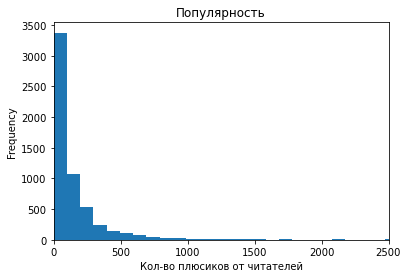

In [49]:
df['kudos'].plot.hist(bins=100, xlim=(0, 2500), title="Популярность")
plt.xlabel("Кол-во плюсиков от читателей")
plt.savefig('v_popular.jpeg')

Text(0.5, 0, 'Кол-во плюсиков от читателей')

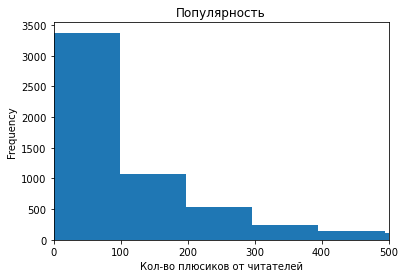

In [47]:
df['kudos'].plot.hist(bins=100, xlim=(0, 500), title="Популярность")
plt.xlabel("Кол-во плюсиков от читателей")

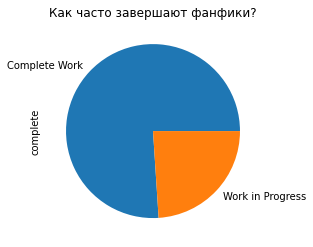

In [50]:
df['complete'].value_counts().plot.pie(title='Как часто завершают фанфики?')
plt.savefig('v_complete.jpeg')

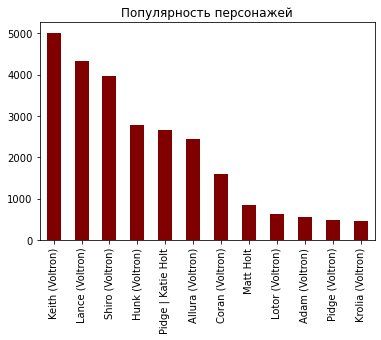

In [72]:
ch['character'].value_counts().head(12).plot.bar(title='Популярность персонажей', color='maroon')
plt.savefig('v_character.jpeg')

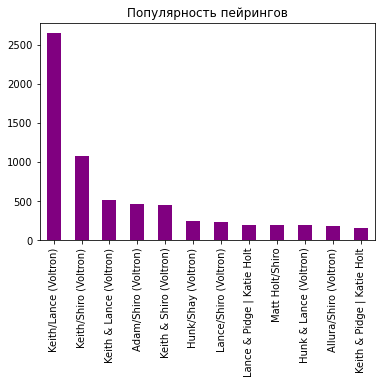

In [78]:
rel['relationship'].value_counts().head(12).plot.bar(title='Популярность пейрингов', color='purple')
plt.savefig('v_relationship.jpeg')

In [68]:
??plt.bar